# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Apoptosis-and-hypoxia:" data-toc-modified-id="Apoptosis-and-hypoxia:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Apoptosis and hypoxia:</a></div><div class="lev1 toc-item"><a href="#Anoxia-Responses:" data-toc-modified-id="Anoxia-Responses:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Anoxia Responses:</a></div><div class="lev1 toc-item"><a href="#HIF-1-Independent-Genes-are-not-independent:-Padmanabha-Genetics-2015:" data-toc-modified-id="HIF-1-Independent-Genes-are-not-independent:-Padmanabha-Genetics-2015:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>HIF-1 Independent Genes are not independent: Padmanabha Genetics 2015:</a></div><div class="lev1 toc-item"><a href="#Hydroxylated-hif-1-Targets:" data-toc-modified-id="Hydroxylated-hif-1-Targets:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hydroxylated hif-1 Targets:</a></div><div class="lev1 toc-item"><a href="#Plotting-HIF-1-Hydroxyl-Downstream-Targets:" data-toc-modified-id="Plotting-HIF-1-Hydroxyl-Downstream-Targets:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting HIF-1 Hydroxyl Downstream Targets:</a></div>

In [4]:
# important stuff:
import os
import pandas as pd
import numpy as np

# TEA and morgan
import tissue_enrichment_analysis as tea
import morgan as morgan

# Graphics
import matplotlib as mpl
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
from matplotlib import rc
rc('text', usetex=True)


# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

ft = 35 #title fontsize
import genpy

In [5]:
fname = '../input/dictionaries/phenotype_dictionary.csv'
phenotype_df = pd.read_csv(fname)
fname = '../input/dictionaries/go_dictionary.csv'
go_df = pd.read_csv(fname)
tissue_df = tea.fetch_dictionary()
tf_df = pd.read_csv('../input/tf_list.csv')
hypoxia_gold = pd.read_csv('../input/hypoxia_gold_standard.csv',
                           sep=',')

genotype_mapping = {'a': r'\emph{egl-9;vhl-1}',
                    'f': r'\emph{egl-9;hif-1}',
                    'b': r'\emph{egl-9}',
                    'c': r'\emph{hif-1}',
                    'd': r'\emph{vhl-1}',
                    'e': r'\emph{rhy-1}',
                    'g': r'\emph{fog-2}'
                    }

genotype_mapping_printing = {'a': 'egl-9;vhl-1',
                    'f': 'egl-9;hif-1',
                    'b': 'egl-9',
                    'c': 'hif-1',
                    'd': 'vhl-1',
                    'e': 'rhy-1',
                    'g': 'fog-2'
                    }


sort_pairs = {'eb': 1, 'be': 1,
              'ed': 2,'de': 2,
              'ec': 3,'ce': 3,
              'eg': 4,'ge': 4,
              'bd': 5,'db': 5,
              'cb': 6,'bc': 6,
              'bg': 7, 'gb': 7,
              'cd': 8,'dc': 8,
              'dg': 9,'gd': 9,
              'cg': 10,'gc': 10
             }

decode_pairs = {'eb': '\emph{rhy-1}, \emph{egl-9}',
                'be': '\emph{rhy-1}, \emph{egl-9}',
                'ed': '\emph{rhy-1}, \emph{vhl-1}',
                'de': '\emph{rhy-1}, \emph{vhl-1}',
                'ec': '\emph{rhy-1}, \emph{hif-1}',
                'ce': '\emph{rhy-1}, \emph{hif-1}',
                'eg': '\emph{rhy-1}, \emph{fog-2}',
                'ge': '\emph{rhy-1}, \emph{fog-2}',
                'bd': '\emph{egl-9}, \emph{vhl-1}',
                'db': '\emph{egl-9}, \emph{vhl-1}',
                'cb': '\emph{egl-9}, \emph{hif-1}',
                'bc': '\emph{egl-9}, \emph{hif-1}',
                'bg': '\emph{egl-9}, \emph{fog-2}',
                'gb': '\emph{egl-9}, \emph{fog-2}',
                'cd': '\emph{vhl-1}, \emph{hif-1}',
                'dc': '\emph{vhl-1}, \emph{hif-1}',
                'dg': '\emph{vhl-1}, \emph{fog-2}',
                'gd': '\emph{vhl-1}, \emph{fog-2}',
                'cg': '\emph{hif-1}, \emph{fog-2}',
                'gc': '\emph{hif-1}, \emph{fog-2}'
               }

In [6]:
# Specify the genotypes to refer to:
single_mutants = ['b', 'c', 'd', 'e', 'g']
# Specify which genotypes are double mutants 
# and of what single mutants:
double_mutants = {'a' : 'bd', 'f':'bc'}

# initialize the morgan.hunt object:
# target_id is the column with isoform specific names
# b is the name of the column with the GLM regression coefficients
# tpm is the name of the column with the TPM numbers
# qval is the name of the column with the FDR corrected q-values
thomas = morgan.hunt('target_id', 'b', 'tpm', 'qval')

# input the genmap file:
thomas.add_genmap('../input/library_genotype_mapping.txt', comment='#')

# add the names of the single mutants
thomas.add_single_mutant(single_mutants)

# add the names of the double mutants
thomas.add_double_mutants(['a', 'f'], ['bd', 'bc'])

# set the q-value threshold for significance to its default value, 0.1
thomas.set_qval()

# Add the tpm files: 
kallisto_loc = '../input/kallisto_all/'
thomas.add_tpm(kallisto_loc, '/kallisto/abundance.tsv', '')

# Make all possible combinations of WT, X
combs = {}
for gene in thomas.genmap.genotype.unique():
    if gene != 'wt':
        combs[gene] = 'WT_'+gene+'/'

# # load all the beta values for each genotype:
# sleuth_loc = '../sleuth/'
# thomas.add_betas(sleuth_loc, 'betas.csv', combs)

# load all the beta values for each genotype:
sleuth_loc = '../sleuth_all_adjusted/kallisto/'
for file in os.listdir("../sleuth_all_adjusted/kallisto"):
    if file[:4] == 'beta':
        letter = file[-5:-4].lower()
        thomas.add_beta(sleuth_loc + file, letter)
        thomas.beta[letter].sort_values('target_id', inplace=True)
        thomas.beta[letter].reset_index(inplace=True)
thomas.filter_data(0, 0.1)

Number of na genes: 232


In [259]:
frames = []
for key, df in thomas.beta.items():
    df['code'] = key
    df['genotype'] = genotype_mapping[key]
    frames += [df]

tidy = pd.concat(frames)

In [262]:
def find_expression(gene, col='ext_gene', genmap=genotype_mapping_printing, q=0.1, df=tidy):
    """Given a gene, find out what genotypes it is DE in."""
    
    results = df[(df[col] == gene) & (df.qval < q)]

    if len(results) > len(results.code.unique()):
        print('Warning: This gene has multiple isoforms.')
        
    return df[(df[col] == gene) & (df.qval < q)]

In [291]:
def print_deg(diff_exp_gene):
    """A fancy print function for a dataframe."""
    if len(diff_exp_gene) > 0:
        print(diff_exp_gene.ext_gene.unique()[0])
        if len(diff_exp_gene.target_id.unique()) == 1:
            print(diff_exp_gene[['genotype', 'b', 'qval']])
        else:
            print(diff_exp_gene[['genotype', 'target_id', 'b', 'qval']])

    else:
        print('Dataframe is Empty')

# Apoptosis and hypoxia:

In [292]:
diff_exp_gene = find_expression('tyr-2')
print_deg(diff_exp_gene)

tyr-2
                 genotype         b          qval
17624  \emph{egl-9;vhl-1}  3.786888  7.255251e-27
17624        \emph{rhy-1}  3.229023  3.238141e-19
17624        \emph{vhl-1}  1.218582  1.442717e-02
17624        \emph{egl-9}  3.651982  5.633134e-25


# Anoxia Responses:

In [293]:
diff_exp_gene = find_expression('san-1', col='ext_gene')
print_deg(diff_exp_gene)

san-1
                 genotype         b      qval
31245  \emph{egl-9;vhl-1}  0.328116  0.002990
31245        \emph{egl-9}  0.265445  0.029947


In [294]:
diff_exp_gene = find_expression('hyl-2', col='ext_gene')
print_deg(diff_exp_gene)

hyl-2
                 genotype         b      qval
16870  \emph{egl-9;vhl-1} -0.266925  0.071218
16870        \emph{egl-9} -0.370397  0.005276


# HIF-1 Independent Genes are not independent: Padmanabha Genetics 2015:

In [296]:
diff_exp_gene = find_expression('WBGene00009724', col='ens_gene')
print_deg(diff_exp_gene)

F45D3.4
                 genotype         b          qval
13251  \emph{egl-9;vhl-1}  1.662158  4.242760e-07
13251        \emph{rhy-1}  1.668968  5.264177e-07
13251        \emph{fog-2} -0.841871  3.570030e-02
13251        \emph{egl-9}  1.506708  7.149037e-06


In [297]:
diff_exp_gene = find_expression('mnk-1', col='ext_gene')
print_deg(diff_exp_gene)

mnk-1
                 genotype target_id         b      qval
20346  \emph{egl-9;vhl-1}   R166.5a  0.483184  0.034564
20346        \emph{hif-1}   R166.5a  0.615076  0.014443
20347        \emph{hif-1}   R166.5b  0.506439  0.040089
20346        \emph{rhy-1}   R166.5a  0.651213  0.001610
20346        \emph{fog-2}   R166.5a -0.692041  0.000599
20346        \emph{egl-9}   R166.5a  0.485370  0.039070


In [299]:
diff_exp_gene = find_expression('icl-1', col='ext_gene')
print_deg(diff_exp_gene)

icl-1
                genotype         b      qval
1717  \emph{egl-9;vhl-1} -0.940495  0.016402
1717  \emph{egl-9;hif-1} -1.047181  0.027856


In [27]:
df1 = thomas.beta['f'].copy()
df2 = thomas.beta['c']
df3 = thomas.beta['e']
df4 = thomas.beta['b']
df5 = thomas.beta['a'] 
df6 = thomas.beta['d']

df1['b_c'] = df2.b
df1['b_e'] = df3.b
df1['b_b'] = df4.b
df1['b_a'] = df5.b
df1['b_d'] = df6.b

df1['se_b_c'] = df2.se_b
df1['se_b_e'] = df3.se_b
df1['se_b_b'] = df4.se_b
df1['se_b_a'] = df5.se_b
df1['se_b_d'] = df6.se_b

df1['q_c'] = df2.qval
df1['q_e'] = df3.qval
df1['q_b'] = df4.qval
df1['q_a'] = df5.qval
df1['q_d'] = df6.qval

# Hydroxylated hif-1 Targets:

In [225]:
n = 1

egl_matches_hif = (df1.b_b*df1.b_c > 0) # if effect is in same direction, this should be true
egl_anti_vhl = (df1.b_b*df1.b_d < 0) # egl effect should be opposite direction of vhl
egl_matches_eglhif = (df1.b_b*df1.b > 0) # egl should be epistatic to hif
egl_matches_eglvhl = (df1.b_b*df1.b_a > 0) # egl should be epistatic to vhl
ind1 = (egl_matches_hif) & (egl_anti_vhl) & (egl_matches_eglhif) & (egl_matches_eglvhl)

sig1 = ((df1.qval < 10**-n) & ((df1.q_b < 10**-n)) &
       (df1.q_c < 10**-n) & (df1.q_d < 10**-n) & (df1.q_a < 10**-n))


rhy_matches_hif = (df1.b_e*df1.b_c > 0) # if effect is in same direction, this should be true
rhy_anti_vhl = (df1.b_e*df1.b_d < 0) # rhy effect should be opposite direction of vhl
rhy_matches_eglhif = (df1.b_e*df1.b > 0) # rhy should be epistatic to hif
rhy_matches_eglvhl = (df1.b_e*df1.b_a > 0) # rhy should be epistatic to vhl
ind2 = (rhy_matches_hif) & (rhy_anti_vhl) & (rhy_matches_eglhif) & (rhy_matches_eglvhl)

sig2 = ((df1.qval < 10**-n) & ((df1.q_e < 10**-n)) &
       (df1.q_c < 10**-n) & (df1.q_d < 10**-n) & (df1.q_a < 10**-n))


# lower confidence genes:
ind3 = (egl_matches_hif) & (egl_anti_vhl) & (egl_matches_eglhif)

sig3 = ((df1.qval < 10**-n) & ((df1.q_b < 10**-n)) &
       (df1.q_c < 10**-n) & (df1.q_d < 10**-n))

ind4 = (rhy_matches_hif) & (rhy_anti_vhl) & (rhy_matches_eglhif)

sig4 = ((df1.qval < 10**-n) & ((df1.q_e < 10**-n)) &
       (df1.q_c < 10**-n) & (df1.q_d < 10**-n))


In [227]:
def pathify(title, xlabel, ylabel, xticks=True, yticks=True, **kwargs):
    """
    A function to pathify the labels, titles and ticks in a plot.
    """
    labelsize = kwargs.pop('labelsize', 20)
    titlesize = kwargs.pop('titlesize', 25)
    
    # make the labels and title into paths
    effect = [path_effects.Normal()]
    plt.ylabel(ylabel,
               fontsize=labelsize).set_path_effects(effect)
    plt.xlabel(xlabel,
               fontsize=labelsize).set_path_effects(effect)
    plt.title(title,
              fontsize=titlesize).set_path_effects(effect)

    ax = plt.gca()
    # go through each xtick or ytick and make 
    # it a path if user specified to do so.
    if xticks == True:
        for i, label in enumerate(ax.get_xticklabels()):
            ax.get_xticklabels()[i].set_path_effects(effect)
    if yticks == True:
        for i, label in enumerate(ax.get_yticklabels()):
            ax.get_yticklabels()[i].set_path_effects(effect)

In [228]:
sorter = {'a': 5,
          'f': 6,
          'b': 2,
          'c': 4,
          'd': 3,
          'e': 1,
          'g': 7
         }

x = df1[(ind1 & sig1) | (ind2 & sig2) | (ind3 & sig3) | (ind4 & sig4)].target_id.values

x_sort = {}
for i, xi in enumerate(x):
    x_sort[xi] = i + 1

In [229]:
x_sort = {'cat-4': 1,
          'F20D6.11': 2,
          'ftn-1': 3,
          'ftn-2': 4,
          'asns-2': 5,
          'cyp-14A5': 6,
          'clec-7': 7,
          'haf-6': 8
         }

tidy = tidy[(tidy.target_id.isin(x)) & (tidy.code != 'g')]
tidy['order'] = tidy.ext_gene.map(x_sort)
tidy.sort_values('order', inplace=True)
tidy.reset_index(inplace=True)  
tidy = tidy[['target_id', 'ens_gene', 'ext_gene','b', 'se_b', 'qval', 'genotype', 'order', 'code']]

In [253]:
# a qPCR barplot
def qPCR_plot(df, plotting, colors, **kwargs):
    """
    A function to make prettified qPCR barplots. 
    
    Takes as entry a dataframe as output by qPCR_prep method
    
    Params:
    df -- df as output by qPCR_prep
    plotting -- a dictionary of plotting order for each gene;
                keys must be in dataframe column 'plotting_group'
    colors -- color to be used for each gene
    kwargs -- clustering - the name of a column within the dataframe,
              bars grouped within the same cluster are given the same color;
              plotting_group - a string that must be a column within the
              dataframe, bars belonging to the same plotting group are 
              plotted adjacent to each other;
              alpha (transparency, float);
              q (stat. sig. thresh, float);
              save (string to save as)
              rotation;
              title
    
    outputs:
    a Seaborn barchart
    """
    clustering = kwargs.pop('clustering', 'ext_gene')
    plotting_group = kwargs.pop('plotting_group', 'genotype')
    alpha = kwargs.pop('alpha', 0.7)
    q = kwargs.pop('q', 0.1)
    save = kwargs.pop('save', '')
    rotation = kwargs.pop('rotation', 45)
    title = kwargs.pop('title', r'\emph{In Silico} qPCR')
    
    index = np.linspace(0, df[plotting_group].unique().shape[0]-1,
                        df[plotting_group].unique().shape[0])
    
    # error bars
    error_config = {'ecolor': '0.2'}

    # groupby gene name if it exists:
    grouped = df.groupby(clustering)
    
    bar_width = 1/(len(grouped)+1)
    
    # go through each gene
    for name, group in grouped:
        # figure out where each bar goes:
        if name not in plotting.keys():
            print(name, 'not in plotting.keys()')
            where = max(plotting.keys(),
                        key=lambda k: plotting[k])
            val = plotting[where]
            plotting[name] = val + 1
        
        add = plotting[name]*bar_width
        # figure out what color to give:
        if name in color.keys():
            # add the bar:
            barlist = plt.bar(index + add + bar_width/2, group.b.values,
                              bar_width, alpha=alpha,
                              yerr=group.se_b.values,
                              error_kw=error_config, label=name,
                              color=color[name])
        else:
            # add the bar but don't specify color
            barlist = plt.bar(index + add, group.b.values,
                              bar_width, alpha=alpha,
                              yerr=group.se_b.values,
                              error_kw=error_config, label=name)

        # significance threshold:
        sig = group.qval < q
        k = group[sig].order - 1

        # plot stars on top of stat. sig. results
        plt.plot(k + add + bar_width/2,
                 group[sig].b.values + group[sig].se_b.values + 0.20,
                 r'*', color='k')
    
    # shade in every other bar group for clarity:
    grouped2 = df.groupby(plotting_group)
    k = 0
    col = '#CFCFCF'

    ymin, ymax = plt.gca().get_ylim()
    for name, group in grouped2:
        if k % 2 == 0:
            xmin = k - bar_width*0.5
            xmax = k + bar_width*(len(grouped) + 0.5)
            
            plt.fill_between([xmin, xmax], ymin, color=col)
            plt.fill_between([xmin, xmax], ymax, color=col)
        k += 1
    
    # fix the xlims and tick params etc...
    if (k - 1) % 2 == 0:
        plt.xlim(0, xmax)
    else:
        plt.xlim(0, plt.gca().get_xlim()[1] - 3/2*bar_width)

    plt.tick_params(axis='y',
                    which='major', labelsize=18)
    
    fancy_names = []
    for label in df[plotting_group].unique():
        if r'\emph' not in label:
            fancy_names += [r'\emph{' + label + r'}']
        else:
            fancy_names += label

    plt.xticks(index + bar_width*len(df[clustering].unique())/2,
               fancy_names, rotation=rotation, fontsize=20)

    pathify(title, '',
            r'Regression Coefficient, $\beta$', )

    plt.legend(loc=(1.02, 0.5),fontsize=15)
    
    plt.ylim(ymin, ymax)
        
    if save:
        print('figure saved')
        plt.savefig(save, bbox_inches='tight')


plot_order = {r'\emph{egl-9;vhl-1}': 4,
              r'\emph{egl-9;hif-1}': 5,
              r'\emph{egl-9}': 1,
              r'\emph{hif-1}': 2,
              r'\emph{vhl-1}': 3,
              r'\emph{rhy-1}': 0
              }

color = {r'\emph{egl-9;vhl-1}':'#e41a1c',
              r'\emph{egl-9;hif-1}':'#377eb8',
              r'\emph{egl-9}': '#4daf4a',
              r'\emph{hif-1}': '#984ea3',
              r'\emph{vhl-1}': '#ff7f00',
              r'\emph{rhy-1}': '#ffff33'
              }

# Plotting HIF-1 Hydroxyl Downstream Targets:

figure saved


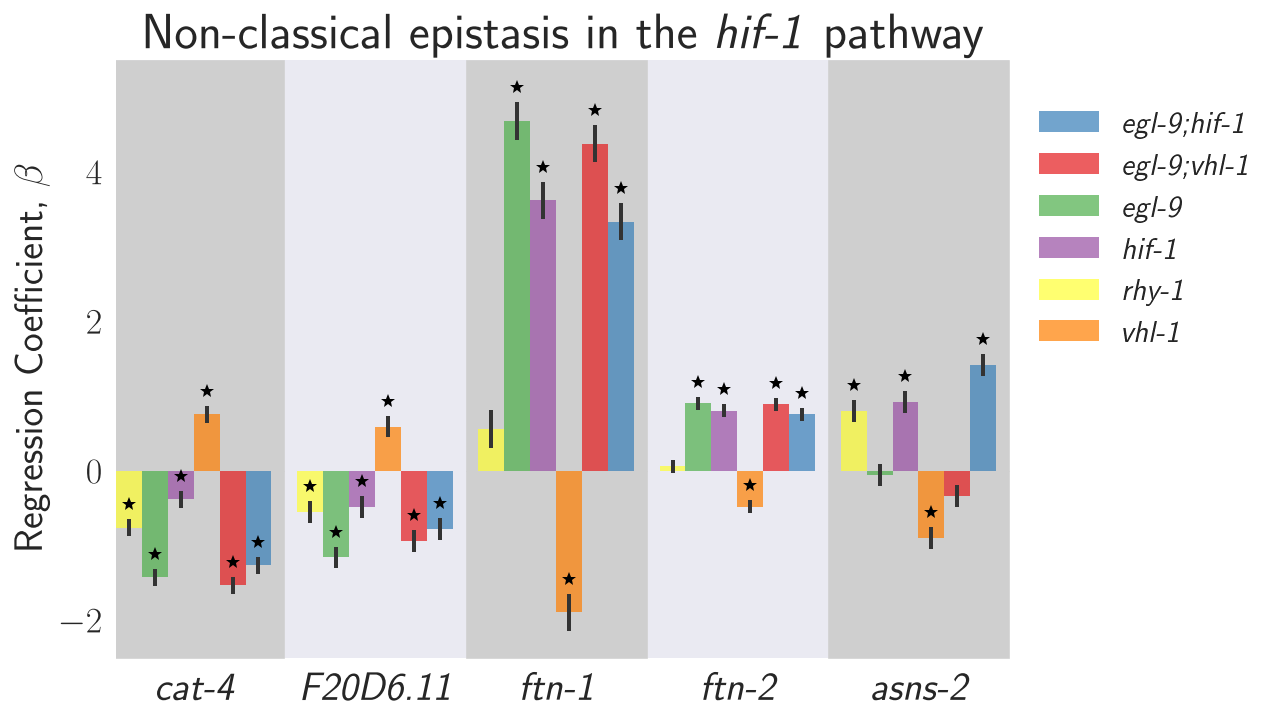

In [254]:
qPCR_plot(tidy, plot_order, color, clustering='genotype', plotting_group='ext_gene',
          title='Non-classical epistasis in the \emph{hif-1} pathway',
          save='hif1oh_genetics.pdf', rotation=0)